<a href="https://colab.research.google.com/github/jlingford/scripts/blob/master/PAE_plotter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload .json file

Make sure it's the `[JOB_NAME]_full_data_0.json` file from AlphaFold3

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving example_pae.json to example_pae (1).json
User uploaded file "example_pae (1).json" with length 3069093 bytes


## PAE plotting code

Some sensible default parameters for the plot.

<Figure size 640x480 with 0 Axes>

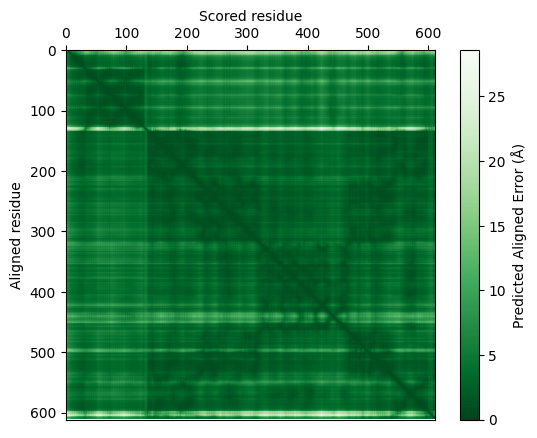

In [ ]:
import json
from pathlib import Path
import matplotlib.pyplot as plt

# enter  path to file
json_file = fn
filename = fn.rpartition(".")[0]

with open(json_file) as f:
    data = json.load(f)

# For AlphaFold3 json files
pae = data["pae"]

# set subplots
fig = plt.figure()
fig, ax = plt.subplots()

# create heatmap
im = ax.imshow(pae, cmap="Greens_r", vmin=0, aspect="equal")

# configure colour bar
fig.colorbar(im, ax=ax, label="Predicted Aligned Error (Å)")

# labels
ax.set_xlabel("Scored residue")
ax.set_ylabel("Aligned residue")

# move x axis to top
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.xaxis.set_label_position("top")

# make tick numbers equal on each axis
ax.set_xticks(range(0, len(pae), 100))
ax.set_yticks(range(0, len(pae), 100))

# ax.set_xticks(range(0, len(pae), len(pae) - 1))
# ax.set_yticks(range(0, len(pae), len(pae) - 1))

# ax.set_xticks([])
# ax.set_yticks([])

# saving figures
plt.savefig(f"{filename}.png", format="png", dpi=300, transparent=True)
#plt.close()

## Download PAE plot

In [ ]:
files.download(f"{filename}.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>